In [666]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [667]:
telco_df = pd.read_csv('./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [668]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [669]:
# Vamos a eliminar la columna de ID, porque no es necesario para nuestro algoritmo
telco_df.drop('customerID', axis=1, inplace=True)

# Vamos a convertir las todas las columnas tipo object con label encoder

le = LabelEncoder()
for col in telco_df.columns:
    if telco_df[col].dtype == 'object':
        telco_df[col] = le.fit_transform(telco_df[col])


In [670]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [671]:
# Comprobamos si hay valores nulos
telco_df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

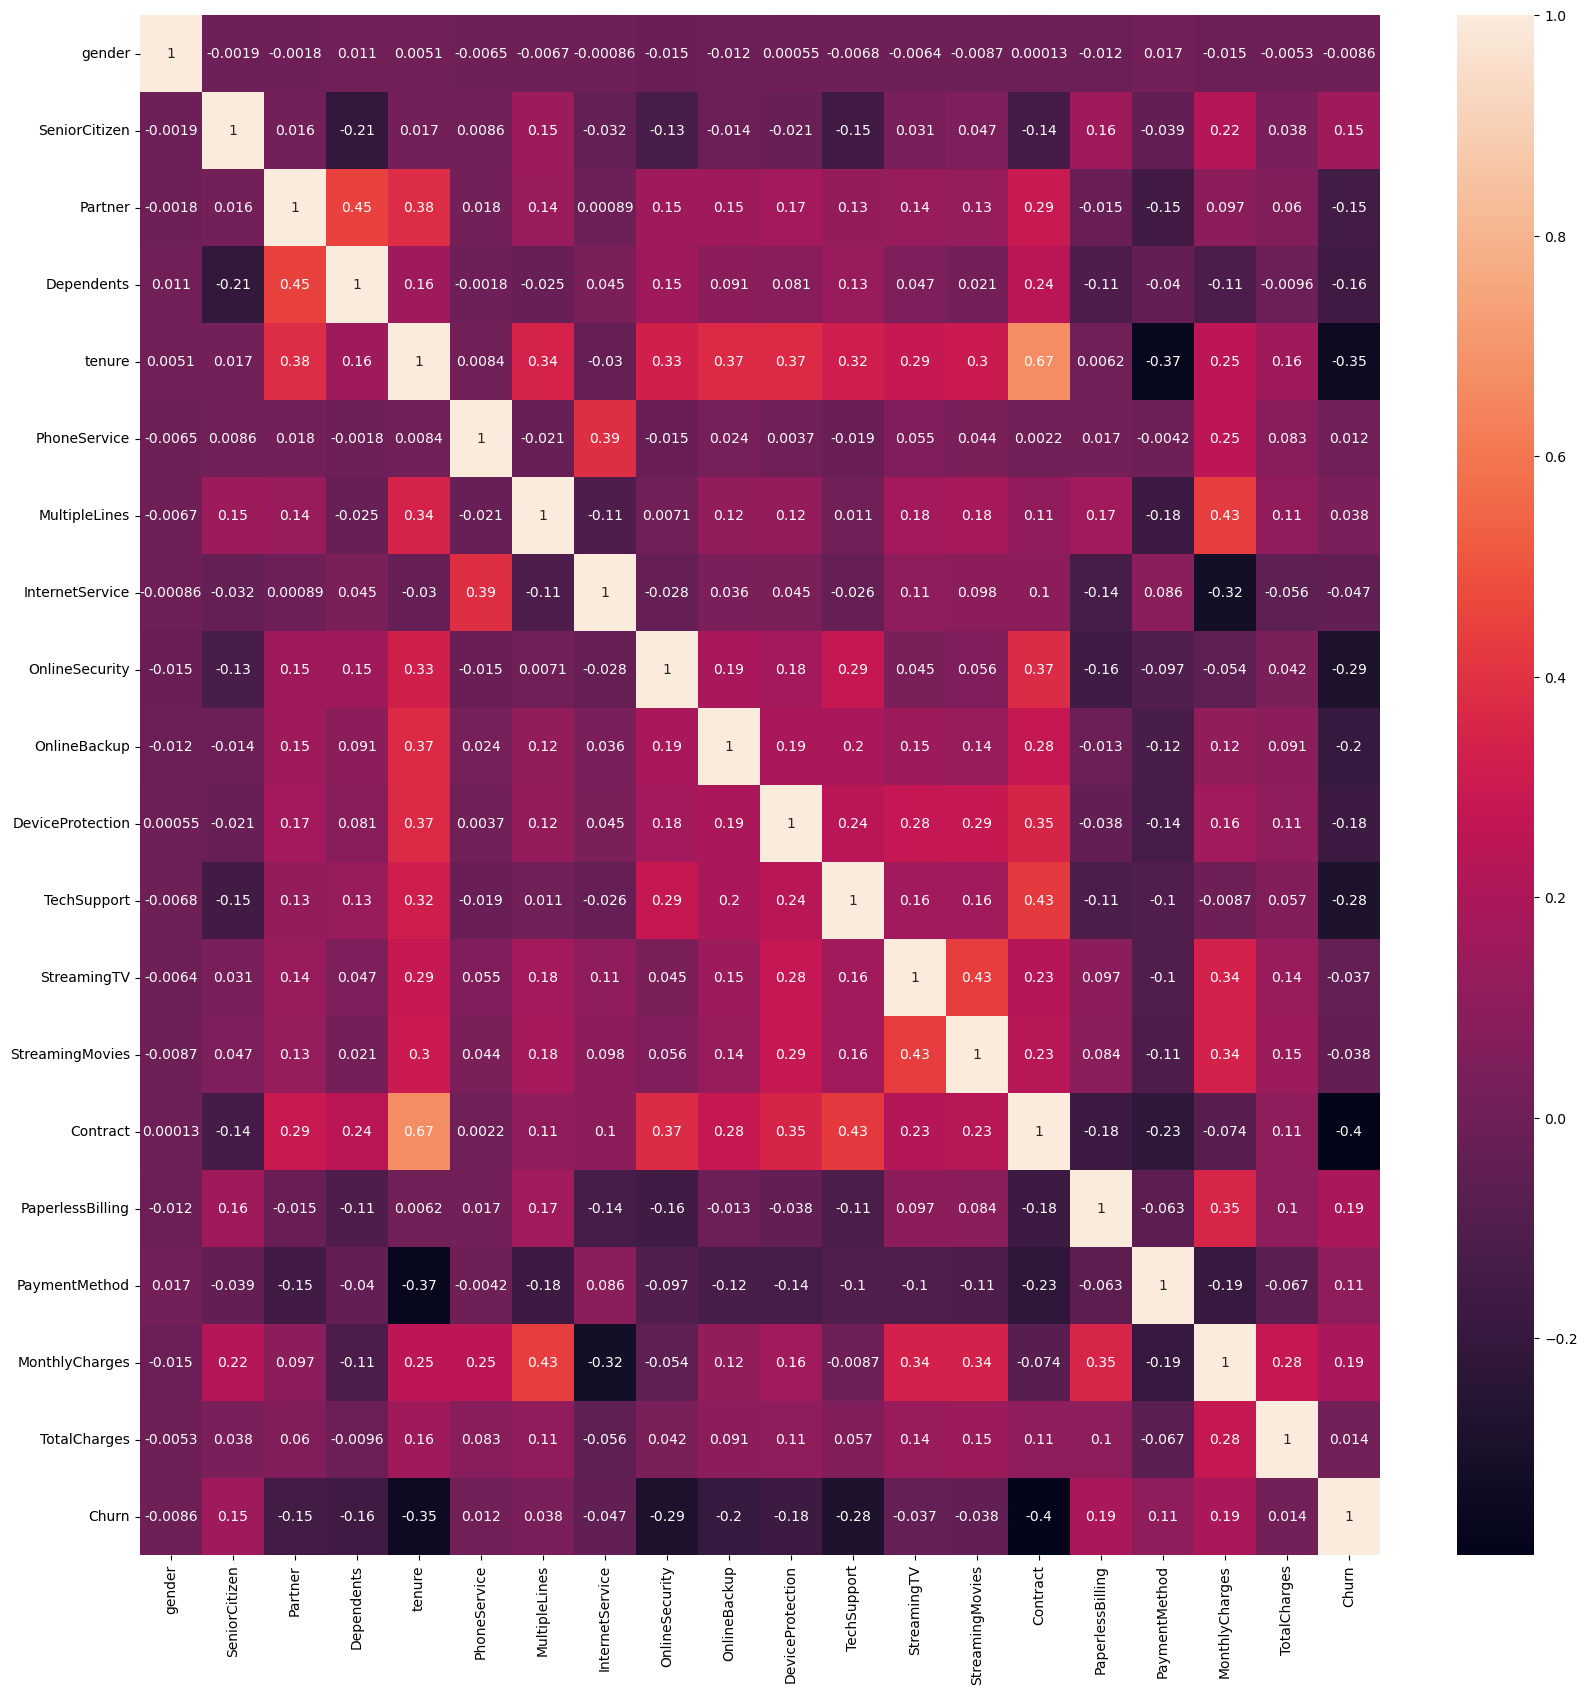

In [672]:
# Creamos un mapa de calor para comprobar las relaciones entre las columnas de nuestro dataframe, la columna con la que vamos a trabajar es Churn

corr = telco_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


In [673]:
# Vamos a entrar un modelo de ia basade en el algoritmo de knn
# Vamos a usar los campos de seniorcitizen, tenure, onlinebackup, techsupport, contract, paperlessbilling, monthlycharges, totalcharges

X = telco_df[['SeniorCitizen', 'Partner', 'tenure', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
y = telco_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [674]:
param_grid = {
    'n_neighbors': range(1, 100),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

In [675]:
"""
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

best_params_grid = grid_search.best_params_
print(f"Mejores hiperparámetros (GridSearchCV): {best_params_grid}")
"""

'\ngrid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\ngrid_search.score(X_test, y_test)\n\nbest_params_grid = grid_search.best_params_\nprint(f"Mejores hiperparámetros (GridSearchCV): {best_params_grid}")\n'

In [676]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=10, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros de RandomizedSearchCV
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros (RandomizedSearchCV): {best_params_random}")

Mejores hiperparámetros (RandomizedSearchCV): {'weights': 'distance', 'p': 1, 'n_neighbors': 82, 'leaf_size': 10, 'algorithm': 'brute'}


In [677]:
knn = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='ball_tree', leaf_size=20, p=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8113475177304964


In [678]:
#utilizo los datos que ya tenía para pruebas
y_pred = knn.predict(X_test)

#podemos también usar predict_proba para tener las probabilidades de clase
probabilidades = knn.predict_proba(X_test)
print(probabilidades[:10]) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print ("Error Cuadrático Medio:", mse)
print ("Raíz del Error Cuadrático Medio:", rmse)
print ("Coeficiente de determinación R2:", r2)

[[0.92 0.08]
 [1.   0.  ]
 [0.52 0.48]
 [0.8  0.2 ]
 [0.6  0.4 ]
 [0.8  0.2 ]
 [0.92 0.08]
 [0.68 0.32]
 [0.72 0.28]
 [1.   0.  ]]
Error Cuadrático Medio: 0.18865248226950354
Raíz del Error Cuadrático Medio: 0.43434143512852136
Coeficiente de determinación R2: 0.03201329671917896


In [679]:
# haz unn df con la real y la predicciones
df = pd.DataFrame({'Real':y_test, 'Prediccion':y_pred})
df

,Real,Prediccion
402,1,0
1292,0,0
1175,0,0
4600,0,0
3464,0,0
...,...,...
1401,1,1
213,0,0
5444,0,0
3031,1,0


In [680]:
# Crear vecinos
neighbors = np.arange(1,30)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  	# escogemos KNN Classifier
	knn = KNeighborsClassifier(neighbor)
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Calcular accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 {np.int64(1): 0.9954244241085516, np.int64(2): 0.8676238561060271, np.int64(3): 0.8663616282739034, np.int64(4): 0.8390659514042285, np.int64(5): 0.8403281792363522, np.int64(6): 0.8250236667718523, np.int64(7): 0.8269170085200379, np.int64(8): 0.8185547491322184, np.int64(9): 0.818081413695172, np.int64(10): 0.8130325023666772, np.int64(11): 0.8100347112653834, np.int64(12): 0.8128747238876617, np.int64(13): 0.8135058378037235, np.int64(14): 0.8108236036604607, np.int64(15): 0.8081413695171978, np.int64(16): 0.8109813821394761, np.int64(17): 0.8082991479962133, np.int64(18): 0.8079835910381824, np.int64(19): 0.8079835910381824, np.int64(20): 0.8051435784159041, np.int64(21): 0.8059324708109814, np.int64(22): 0.8053013568949196, np.int64(23): 0.8051435784159041, np.int64(24): 0.8038813505837804, np.int64(25): 0.803408015146734, np.int64(26): 0.8038813505837804, np.int64(27): 0.803408015146734, n

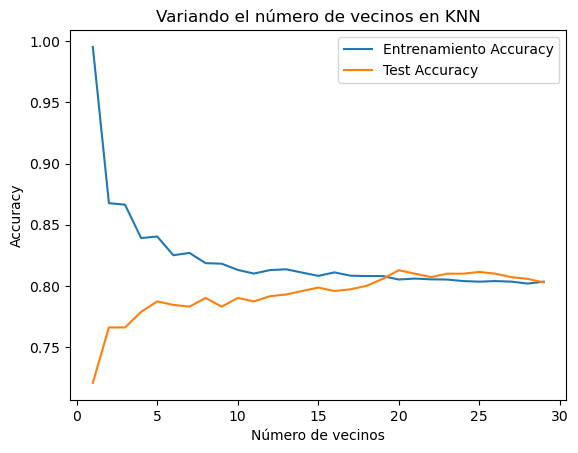

In [681]:
plt.title("Variando el número de vecinos en KNN")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Entrenamiento Accuracy") 

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy") 

plt.legend()
plt.xlabel("Número de vecinos")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [682]:
cm = confusion_matrix(y_test, y_pred)

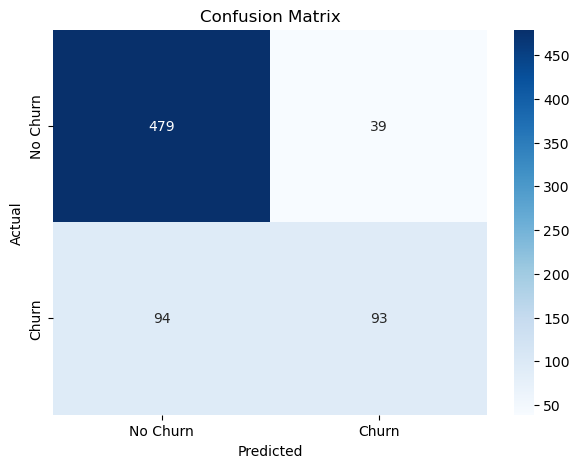

In [683]:
# Create a confusion matrix from the variable cm to calculate the number of correct and incorrect predictions between Churn 0 or 1, i.e., whether the customer left the company or not
# Add below the number if it is TP, FP, TN, FN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()